In [1]:
import pandas as pd
import datetime as dt
read = pd.read_excel('Online Retail.xlsx')
read.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
read["TotalSum"]=read["UnitPrice"]*read["Quantity"]
read.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
read["InvoiceDate"] = pd.to_datetime(read["InvoiceDate"])
read["InvoiceDate"] = pd.to_datetime(read["InvoiceDate"].dt.strftime('%Y-%m-%d')) # excluding hours and minutes.
snapshot = read["InvoiceDate"].max()
snapshot = snapshot + pd.Timedelta(days=1)
print("Our snapshot date: ", snapshot)
read.head()

Our snapshot date:  2011-12-10 00:00:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [7]:
customer_group = read.groupby("CustomerID")
recency = (snapshot - customer_group["InvoiceDate"].max())
frequency = customer_group["InvoiceNo"].nunique()
monetary = customer_group["TotalSum"].sum()
tenure = snapshot-customer_group["InvoiceDate"].min()
rfm = pd.DataFrame()
rfm["Recency"] = recency.dt.days
rfm["Frequency"] = frequency
rfm["Monetary"] = monetary
rfm["Tenure"] = tenure.dt.days
rfm

,Recency,Frequency,Monetary,Tenure
CustomerID,,,,
12346.0,326,2,0.00,326
12347.0,3,7,4310.00,368
12348.0,76,4,1797.24,359
12349.0,19,1,1757.55,19
12350.0,311,1,334.40,311
...,...,...,...,...
18280.0,278,1,180.60,278
18281.0,181,1,80.82,181
18282.0,8,3,176.60,127


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = rfm.values
n_cluster = range(2, 11, 1)
inertia_value = []

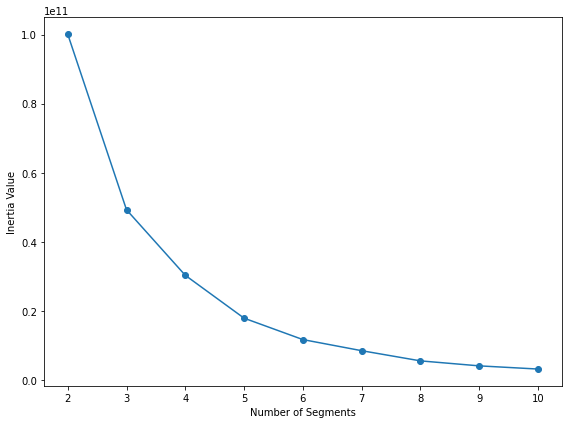

In [9]:
for i in n_cluster:
    model = KMeans(n_clusters=i, random_state=13)
    model.fit(X)
    inertia_value.append(model.inertia_)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(n_cluster, inertia_value, marker="o")
ax.set_xlabel("Number of Segments")
ax.set_ylabel("Inertia Value")

fig.tight_layout()

In [11]:
n_cluster = 5
model = KMeans(n_clusters=n_cluster, random_state=28)
y=model.fit_predict(X)

rfm["Segment"] = y
rfm.head()

,Recency,Frequency,Monetary,Tenure,Segment
CustomerID,,,,,
12346.0,326,2,0.00,326,0
12347.0,3,7,4310.00,368,0
12348.0,76,4,1797.24,359,0
12349.0,19,1,1757.55,19,0
12350.0,311,1,334.40,311,0


In [12]:
rfm.groupby("Segment").mean()

,Recency,Frequency,Monetary,Tenure
Segment,,,,
0,97.950884,3.644401,947.571170,218.407908
1,9.800000,88.200000,129057.952000,365.400000
2,7.333333,58.259259,40928.794815,353.148148
3,1.500000,69.500000,267963.755000,361.500000
4,21.274436,19.537594,8102.486015,330.676692


In [13]:
humanization = {3:"Diamond", 1:"Platinum", 2:"Gold", 4:"Silver", 0:"Bronze"}
rfm["Segment"].replace(humanization, inplace=True)
rfm

,Recency,Frequency,Monetary,Tenure,Segment
CustomerID,,,,,
12346.0,326,2,0.00,326,Bronze
12347.0,3,7,4310.00,368,Bronze
12348.0,76,4,1797.24,359,Bronze
12349.0,19,1,1757.55,19,Bronze
12350.0,311,1,334.40,311,Bronze
...,...,...,...,...,...
18280.0,278,1,180.60,278,Bronze
18281.0,181,1,80.82,181,Bronze
18282.0,8,3,176.60,127,Bronze
